In [7]:
import empylib as em
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
D_nw = 700  # nanometers
Ac = np.pi*(D_nw*1e-3)**2/4  # um^2

folder_name = f'tio2_D{D_nw}nm'
file_name = folder_name + '/' + f'tio2_D{D_nw:.0f}.AVSCAT.EMTPFT'
obj_scatter = em.scuffem.read_avescatter(file_name)
obj_scatter_fix = em.scuffem.clean_data(obj_scatter, inplace = False)

In [9]:
lam = 2*np.pi/obj_scatter[1].index
Csca = obj_scatter[1]['<Csca>']
Cabs = obj_scatter[1]['<Cabs>']
gcos = obj_scatter[1]['<Cpr>']/obj_scatter[1]['<Csca>']

In [ ]:
lam = 2*np.pi/obj_scatter_fix[1].index
Csca_fix = obj_scatter_fix[1]['<Csca>']
Cabs_fix = obj_scatter_fix[1]['<Cabs>']
gcos_fix = obj_scatter_fix[1]['<Cpr>']/obj_scatter_fix[1]['<Csca>']

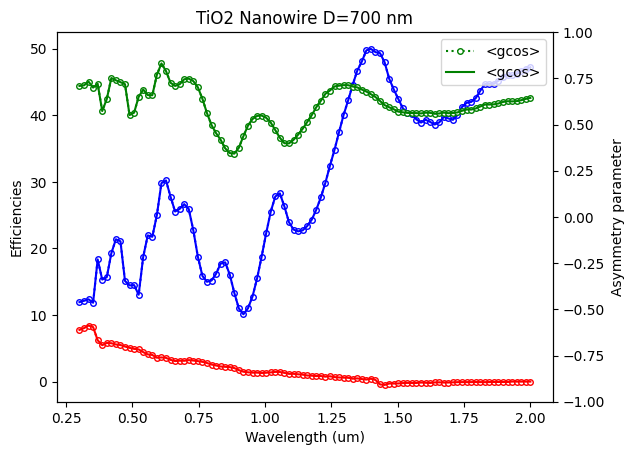

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(lam, Csca/Ac, 'o:b', label='<Csca>/Ac', ms = 4, mfc = 'w')
ax.plot(lam, Cabs/Ac, 'o:r', label='<Cabs>/Ac', ms = 4, mfc = 'w')
ax2.plot(lam, gcos, 'o:g', label='<gcos>', ms = 4, mfc = 'w')

ax.plot(lam, Csca_fix/Ac, '-b', label='<Csca>/Ac', ms = 4, mfc = 'w')
ax.plot(lam, Cabs_fix/Ac, '-r', label='<Cabs>/Ac', ms = 4, mfc = 'w')
ax2.plot(lam, gcos_fix, '-g', label='<gcos>', ms = 4, mfc = 'w')

ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Efficiencies')
ax.set_title(f'TiO2 Nanowire D={D_nw} nm')
# ax.set_ylim(top = 55)

ax2.set_ylabel('Asymmetry parameter')
ax2.set_ylim(-1,1)

plt.legend()   
plt.show()

In [12]:
# Verification: ensure no negative values remain in <Csca> and <Cabs>
import pandas as pd
columns_verify = ['<Csca>', '<Cabs>']
negatives = {}
for k, v in obj_scatter.items():
    if isinstance(v, pd.DataFrame):
        for col in columns_verify:
            if col in v.columns:
                count_neg = (v[col] < 0).sum()
                if count_neg > 0:
                    negatives.setdefault(k, {})[col] = int(count_neg)

if negatives:
    print("Negative values persist:")
    print(negatives)
else:
    print("Verification OK: no negative values in <Csca> and <Cabs>.")

Negative values persist:
{1: {'<Cabs>': 29}}
